# TF-IDF

## Preprocessing and Building Models

In [1]:
# Library
import os
import datetime
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text
def clean_text(text):
    # Check if text is a string
    if not isinstance(text, str):
        return ''  # or some other placeholder text like 'missing_text'

    # Removing URLs
    text = re.sub(r'http\S+', '', text)
    # Removing characters that are not letters or numbers
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    # Converting text to lowercase
    text = text.lower()
    # Removing stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


### 2023 Data Set

In [2]:
# 2023
comments = pd.read_csv('comments_2023_clean.csv',engine = 'python')

# Applying the cleaning function to the comment text
comments['cleaned_text'] = comments['text'].apply(clean_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500) 

# Fit and transform the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(comments['cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Calculating the maximum TF-IDF score for each word (column) across all comments (rows)
max_tfidf_scores = tfidf_df.max()

# Creating a DataFrame to display words and their max TF-IDF scores
top_words_tfidf = pd.DataFrame(max_tfidf_scores, columns=['Max TF-IDF Score']).reset_index()
top_words_tfidf.rename(columns={'index': 'Word'}, inplace=True)

# Sorting the DataFrame to show the words with the highest TF-IDF scores first
top_words_tfidf = top_words_tfidf.sort_values(by='Max TF-IDF Score', ascending=False)


from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    # Check if text is a string
    if not isinstance(text, str):
        return 0  # Returning a neutral sentiment score for non-string texts

    return TextBlob(text).sentiment.polarity


# Apply the function to the original text (not the cleaned text)
comments['sentiment_polarity'] = comments['text'].apply(calculate_sentiment)

# Adding sentiment polarity to the TF-IDF DataFrame
tfidf_df['sentiment_polarity'] = comments['sentiment_polarity']

# Identifying comments with strongly positive or negative sentiments
# Setting arbitrary thresholds for demonstration: 
# Strongly positive (> 0.5), Strongly negative (< -0.5)
strongly_positive = tfidf_df[tfidf_df['sentiment_polarity'] > 0.5]
strongly_negative = tfidf_df[tfidf_df['sentiment_polarity'] < -0.5]

# Calculating average TF-IDF scores for these subsets
avg_tfidf_positive = strongly_positive.drop('sentiment_polarity', axis=1).mean().sort_values(ascending=False)
avg_tfidf_negative = strongly_negative.drop('sentiment_polarity', axis=1).mean().sort_values(ascending=False)

top_positive_words_23 = avg_tfidf_positive.head(35)
top_negative_words_23 = avg_tfidf_negative.head(35)




#### 2022 Data Set

In [3]:
# 2022
comments = pd.read_csv('/Users/lian/Data/Data/final/comments_2022_clean.csv',engine = 'python')

# Applying the cleaning function to the comment text
comments['cleaned_text'] = comments['text'].apply(clean_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)

# Fit and transform the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(comments['cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Calculating the maximum TF-IDF score for each word (column) across all comments (rows)
max_tfidf_scores = tfidf_df.max()

# Creating a DataFrame to display words and their max TF-IDF scores
top_words_tfidf = pd.DataFrame(max_tfidf_scores, columns=['Max TF-IDF Score']).reset_index()
top_words_tfidf.rename(columns={'index': 'Word'}, inplace=True)

# Sorting the DataFrame to show the words with the highest TF-IDF scores first
top_words_tfidf = top_words_tfidf.sort_values(by='Max TF-IDF Score', ascending=False)


# Apply the function to the original text (not the cleaned text)
comments['sentiment_polarity'] = comments['text'].apply(calculate_sentiment)

# Adding sentiment polarity to the TF-IDF DataFrame
tfidf_df['sentiment_polarity'] = comments['sentiment_polarity']

# Identifying comments with strongly positive or negative sentiments
# Setting arbitrary thresholds for demonstration: 
# Strongly positive (> 0.5), Strongly negative (< -0.5)
strongly_positive = tfidf_df[tfidf_df['sentiment_polarity'] > 0.5]
strongly_negative = tfidf_df[tfidf_df['sentiment_polarity'] < -0.5]

# Calculating average TF-IDF scores for these subsets
avg_tfidf_positive = strongly_positive.drop('sentiment_polarity', axis=1).mean().sort_values(ascending=False)
avg_tfidf_negative = strongly_negative.drop('sentiment_polarity', axis=1).mean().sort_values(ascending=False)

top_positive_words_22 = avg_tfidf_positive.head(35)
top_negative_words_22 = avg_tfidf_negative.head(35)




#### 2021 Data Set

In [4]:
# 2021
comments = pd.read_csv('/Users/lian/Data/Data/final/comments_2021_clean.csv',engine = 'python')

# Applying the cleaning function to the comment text
comments['cleaned_text'] = comments['text'].apply(clean_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)

# Fit and transform the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(comments['cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Calculating the maximum TF-IDF score for each word (column) across all comments (rows)
max_tfidf_scores = tfidf_df.max()

# Creating a DataFrame to display words and their max TF-IDF scores
top_words_tfidf = pd.DataFrame(max_tfidf_scores, columns=['Max TF-IDF Score']).reset_index()
top_words_tfidf.rename(columns={'index': 'Word'}, inplace=True)

# Sorting the DataFrame to show the words with the highest TF-IDF scores first
top_words_tfidf = top_words_tfidf.sort_values(by='Max TF-IDF Score', ascending=False)


# Apply the function to the original text (not the cleaned text)
comments['sentiment_polarity'] = comments['text'].apply(calculate_sentiment)

# Adding sentiment polarity to the TF-IDF DataFrame
tfidf_df['sentiment_polarity'] = comments['sentiment_polarity']

# Identifying comments with strongly positive or negative sentiments
# Setting arbitrary thresholds for demonstration: 
# Strongly positive (> 0.5), Strongly negative (< -0.5)
strongly_positive = tfidf_df[tfidf_df['sentiment_polarity'] > 0.5]
strongly_negative = tfidf_df[tfidf_df['sentiment_polarity'] < -0.5]

# Calculating average TF-IDF scores for these subsets
avg_tfidf_positive = strongly_positive.drop('sentiment_polarity', axis=1).mean().sort_values(ascending=False)
avg_tfidf_negative = strongly_negative.drop('sentiment_polarity', axis=1).mean().sort_values(ascending=False)

top_positive_words_21 = avg_tfidf_positive.head(35)
top_negative_words_21 = avg_tfidf_negative.head(35)




#### 2020 Data Set

In [5]:
# 2022
comments = pd.read_csv('/Users/lian/Data/Data/final/comments_2020_clean.csv',engine = 'python')

# Applying the cleaning function to the comment text
comments['cleaned_text'] = comments['text'].apply(clean_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)

# Fit and transform the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(comments['cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Calculating the maximum TF-IDF score for each word (column) across all comments (rows)
max_tfidf_scores = tfidf_df.max()

# Creating a DataFrame to display words and their max TF-IDF scores
top_words_tfidf = pd.DataFrame(max_tfidf_scores, columns=['Max TF-IDF Score']).reset_index()
top_words_tfidf.rename(columns={'index': 'Word'}, inplace=True)

# Sorting the DataFrame to show the words with the highest TF-IDF scores first
top_words_tfidf = top_words_tfidf.sort_values(by='Max TF-IDF Score', ascending=False)


# Apply the function to the original text (not the cleaned text)
comments['sentiment_polarity'] = comments['text'].apply(calculate_sentiment)

# Adding sentiment polarity to the TF-IDF DataFrame
tfidf_df['sentiment_polarity'] = comments['sentiment_polarity']

# Identifying comments with strongly positive or negative sentiments
# Setting arbitrary thresholds for demonstration: 
# Strongly positive (> 0.5), Strongly negative (< -0.5)
strongly_positive = tfidf_df[tfidf_df['sentiment_polarity'] > 0.5]
strongly_negative = tfidf_df[tfidf_df['sentiment_polarity'] < -0.5]

# Calculating average TF-IDF scores for these subsets
avg_tfidf_positive = strongly_positive.drop('sentiment_polarity', axis=1).mean().sort_values(ascending=False)
avg_tfidf_negative = strongly_negative.drop('sentiment_polarity', axis=1).mean().sort_values(ascending=False)

top_positive_words_20 = avg_tfidf_positive.head(35)
top_negative_words_20 = avg_tfidf_negative.head(35)


#### 2019 Data Set

In [6]:
# 2022
comments = pd.read_csv('/Users/lian/Data/Data/final/comments_2019_clean.csv',engine = 'python')

# Applying the cleaning function to the comment text
comments['cleaned_text'] = comments['text'].apply(clean_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)

# Fit and transform the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(comments['cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Calculating the maximum TF-IDF score for each word (column) across all comments (rows)
max_tfidf_scores = tfidf_df.max()

# Creating a DataFrame to display words and their max TF-IDF scores
top_words_tfidf = pd.DataFrame(max_tfidf_scores, columns=['Max TF-IDF Score']).reset_index()
top_words_tfidf.rename(columns={'index': 'Word'}, inplace=True)

# Sorting the DataFrame to show the words with the highest TF-IDF scores first
top_words_tfidf = top_words_tfidf.sort_values(by='Max TF-IDF Score', ascending=False)


# Apply the function to the original text (not the cleaned text)
comments['sentiment_polarity'] = comments['text'].apply(calculate_sentiment)

# Adding sentiment polarity to the TF-IDF DataFrame
tfidf_df['sentiment_polarity'] = comments['sentiment_polarity']

# Identifying comments with strongly positive or negative sentiments
# Setting arbitrary thresholds for demonstration: 
# Strongly positive (> 0.5), Strongly negative (< -0.5)
strongly_positive = tfidf_df[tfidf_df['sentiment_polarity'] > 0.5]
strongly_negative = tfidf_df[tfidf_df['sentiment_polarity'] < -0.5]

# Calculating average TF-IDF scores for these subsets
avg_tfidf_positive = strongly_positive.drop('sentiment_polarity', axis=1).mean().sort_values(ascending=False)
avg_tfidf_negative = strongly_negative.drop('sentiment_polarity', axis=1).mean().sort_values(ascending=False)

top_positive_words_19 = avg_tfidf_positive.head(35)
top_negative_words_19 = avg_tfidf_negative.head(35)


## Plotting

In [7]:
top_positive_words_23 = top_positive_words_23.reset_index()
top_positive_words_23.columns = ['Word', 'Average TF-IDF Score']

top_negative_words_23 = top_negative_words_23.reset_index()
top_negative_words_23.columns = ['Word', 'Average TF-IDF Score']


In [8]:
top_positive_words_22 = top_positive_words_22.reset_index()
top_positive_words_22.columns = ['Word', 'Average TF-IDF Score']

top_negative_words_22 = top_negative_words_22.reset_index()
top_negative_words_22.columns = ['Word', 'Average TF-IDF Score']

top_positive_words_21 = top_positive_words_21.reset_index()
top_positive_words_21.columns = ['Word', 'Average TF-IDF Score']

top_negative_words_21 = top_negative_words_21.reset_index()
top_negative_words_21.columns = ['Word', 'Average TF-IDF Score']

top_positive_words_20 = top_positive_words_20.reset_index()
top_positive_words_20.columns = ['Word', 'Average TF-IDF Score']

top_negative_words_20 = top_negative_words_20.reset_index()
top_negative_words_20.columns = ['Word', 'Average TF-IDF Score']

top_positive_words_19 = top_positive_words_19.reset_index()
top_positive_words_19.columns = ['Word', 'Average TF-IDF Score']

top_negative_words_19 = top_negative_words_19.reset_index()
top_negative_words_19.columns = ['Word', 'Average TF-IDF Score']

(-0.5, 799.5, 399.5, -0.5)

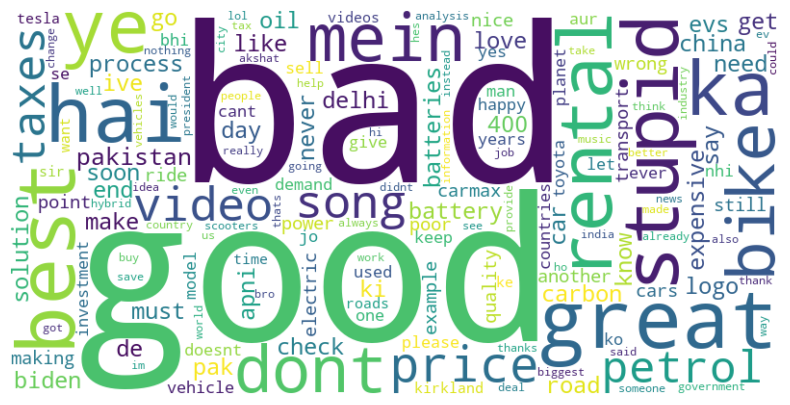

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a combined dictionary from the DataFrames
combined_word_scores = {}
for df in [top_positive_words_23, top_negative_words_23,
           top_positive_words_22, top_negative_words_22,
           top_positive_words_21, top_negative_words_21,
           top_positive_words_20, top_negative_words_20,
           top_positive_words_19, top_negative_words_19]:
    word_scores = dict(zip(df['Word'], df['Average TF-IDF Score']))
    combined_word_scores.update(word_scores)

# Creating the word cloud with word frequencies based on their TF-IDF scores
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(combined_word_scores)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


In [13]:
combined_word_scores = {}
for df in [top_negative_words_23, 
           top_negative_words_22, 
           top_negative_words_21, 
           top_negative_words_20,
           top_negative_words_19]:
    word_scores = dict(zip(df['Word'], df['Average TF-IDF Score']))
    combined_word_scores.update(word_scores)

combined_negative_scores = combined_word_scores

In [16]:
combined_word_scores = {}
for df in [top_positive_words_23, 
           top_positive_words_22, 
           top_positive_words_21, 
           top_positive_words_20,
           top_positive_words_19]:
    word_scores = dict(zip(df['Word'], df['Average TF-IDF Score']))
    combined_word_scores.update(word_scores)

combined_positive_scores = combined_word_scores

In [14]:
# Checking if a unique word in combined_word_scores has only one score

# Verifying by checking for duplicate words
duplicate_words_check = pd.Series(list(combined_word_scores.keys())).duplicated().any()

# Checking the result
duplicate_words_check


False

In [17]:
import pandas as pd

# Assuming combined_word_scores is your dictionary
combined_positive_scores_df = pd.DataFrame.from_dict(combined_positive_scores, orient='index', columns=['TF-IDF Score'])
combined_positive_scores_df.reset_index(inplace=True)
combined_positive_scores_df.rename(columns={'index': 'Word'}, inplace=True)


In [18]:
# After manually labeled data
combined_negative_df = pd.read_excel('combined_negative_relevant.xlsx')
combined_positive_df = pd.read_excel('combined_positive_relevant.xlsx')

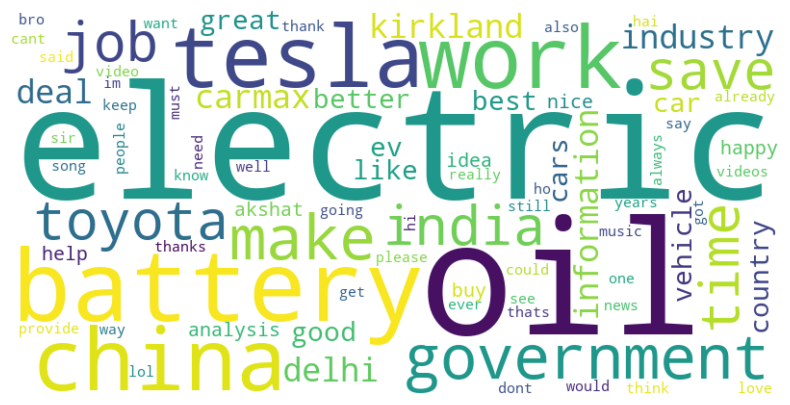

In [19]:
# Converting the DataFrame to a dictionary
word_relevance_scores = dict(zip(combined_positive_df['Word'], combined_positive_df['relevant']))

# Creating the word cloud with word frequencies based on their relevance scores
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_relevance_scores)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


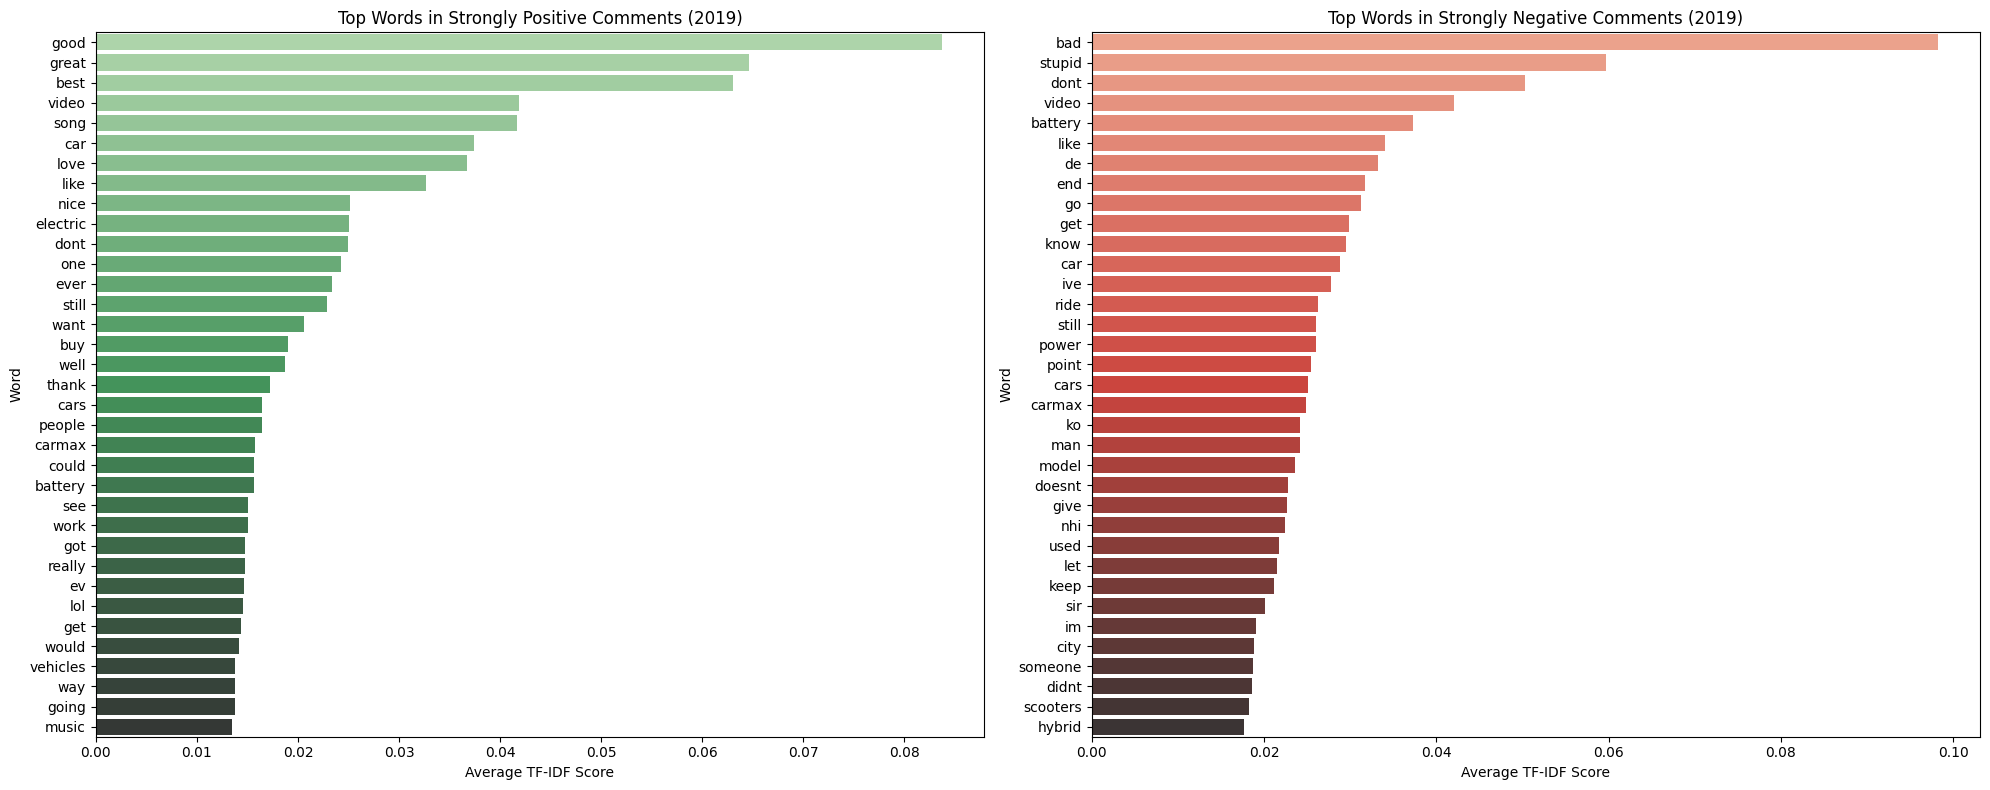

In [20]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot for top positive words
sns.barplot(x='Average TF-IDF Score', y='Word', data=top_positive_words_19, ax=axes[0], palette="Greens_d")
axes[0].set_title('Top Words in Strongly Positive Comments (2019)')

# Plot for top negative words
sns.barplot(x='Average TF-IDF Score', y='Word', data=top_negative_words_19, ax=axes[1], palette="Reds_d")
axes[1].set_title('Top Words in Strongly Negative Comments (2019)')

plt.tight_layout()
#plt.savefig('/Users/lian/Data/Data/final/both_2019.png')